In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [36]:
plt.style.use('seaborn-notebook')
plt.style.use('ggplot')

# 5.1 Discrete probability simulation

a) simlluate process

This would be a binomial process with success rate 0.6 and stopping criteria of failure 2 in a row

In [2]:
np.random.binomial(1,0.6)

1

In [3]:
stopping_criteria = False
shots = []
p = 0.6
shots.append(np.random.binomial(1,0.6)) #first shot
while stopping_criteria == False:
    shot = np.random.binomial(1,0.6)
    print(f"shot is {shot}, last shot is {shots[-1]}")
    if (shots[-1] == 0) & (shot == 0):
        stopping_criteria = True
    shots.append(shot)

shot is 0, last shot is 1
shot is 1, last shot is 0
shot is 0, last shot is 1
shot is 1, last shot is 0
shot is 0, last shot is 1
shot is 1, last shot is 0
shot is 0, last shot is 1
shot is 1, last shot is 0
shot is 1, last shot is 1
shot is 0, last shot is 1
shot is 1, last shot is 0
shot is 1, last shot is 1
shot is 0, last shot is 1
shot is 1, last shot is 0
shot is 0, last shot is 1
shot is 0, last shot is 0


In [16]:
def basketball_throws(n):
    dist_shots = []
    for i in range(0,n):
        stopping_criteria = False
        shots = []
        p = 0.6
        shots.append(np.random.binomial(1,0.6)) #first shot
        while stopping_criteria == False:
            shot = np.random.binomial(1,0.6)
            if (shots[-1] == 0) & (shot == 0):
                stopping_criteria = True
            shots.append(shot)
        dist_shots.append(shots)
    return dist_shots

In [17]:
dist_shots = basketball_throws(1000)

In [18]:
num_shots_sim = [len(x) for x in dist_shots]

In [20]:
np.mean(num_shots_sim)

8.814

In [21]:
np.std(num_shots_sim)

7.1767265518479935

(array([564., 203., 126.,  53.,  32.,  14.,   5.,   1.,   1.,   1.]),
 array([ 2. ,  7.3, 12.6, 17.9, 23.2, 28.5, 33.8, 39.1, 44.4, 49.7, 55. ]),
 <a list of 10 Patch objects>)

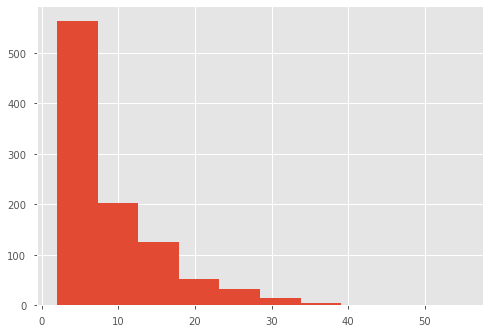

In [37]:
plt.hist(num_shots_sim)

In [38]:
success_shots_sim = [sum(x)/len(x) for x in dist_shots]

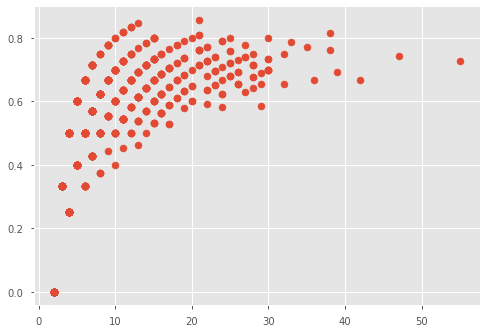

In [39]:
plt.scatter(num_shots_sim, success_shots_sim)

# 5.2 Continuous probability simulation

An additional information here is that there's approximately 52% women in US and 48% men. I wish the problem gives all the necessary information....

In [426]:
def sim_weight(n_sim=1000, n_draw=10):
    dist_log_weight = []
    for i in range(0, n_sim):
        #initialize
        log_weight = []
        for j in range(1,n_draw):
            gender = np.random.binomial(0,0.52)# 1 being female
            if gender == 1:
                person_log_weight = np.random.normal(4.96, 0.20)
            else:
                person_log_weight = np.random.normal(5.13, 0.17)
            log_weight.append(person_log_weight)
        dist_log_weight.append(log_weight)
    return dist_log_weight

In [427]:
dist_log_weight = sim_weight()

In [428]:
#calculate the sum of each of those 10 people

In [429]:
sum_weight = [sum(np.exp(x)) for x in dist_log_weight]

In [430]:
max_weight = 1750

In [431]:
greater_than_max = np.where(np.array(sum_weight) > max_weight, 1, 0)

do it by the discrete probability from last time. Assume that each trial (get 10 ppl) is an independent survey, and we have surveyed 1000 times, what's the proportion of surveys that exceeds the max weight and the error?

In [432]:
#empirical odds
empirical_odds = greater_than_max.sum()/len(greater_than_max)

In [433]:
empirical_odds

0.015

In [434]:
#empirical error 
empirical_error = np.sqrt(empirical_odds*(1-empirical_odds)/len(greater_than_max))

In [435]:
empirical_error

0.003843826218756514

Alternatively we can think about it in terms of just distributions. NULL hypothesis is that weight - max_weight = 0. What is the probability (i.e cdf of this normal distribution that weight-max_weight > 0)?

Essentially, we just have to find the standard deviation of the distribution weight - max_weight

In [436]:
sigma = np.std(np.array(sum_weight) - max_weight)

In [437]:
sigma

88.97144477882809

In [438]:
mean = np.mean(np.array(sum_weight)-max_weight)

In [439]:
mean

-205.34006922476013

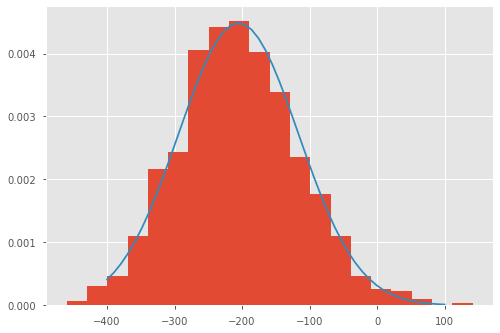

In [440]:
plt.hist(np.array(sum_weight)-max_weight, bins=20, density=True)
x = np.linspace(-400,100)
y = stats.norm.pdf(x,mean,sigma)
plt.plot(x,y)

In [441]:
z = (0-mean)/(sigma)
z

2.3079322779933484

This mean would shift depending on the draws as well 

In [442]:
1-stats.norm.cdf(z)

0.010501451720852484

Is this within the empirical observation?

In [443]:
empirical_odds-2*empirical_error

0.007312347562486971

In [444]:
empirical_odds

0.015

Actually repeatedly doing this show the z-score and the empirical odds do shift quite a bit, but maybe the empirical odds makes more sense if we do larger draws

In [445]:
def weight_n_sims(n_sim):
    dist_log_weight = sim_weight(n_sim=n_sim)

    sum_weight = [sum(np.exp(x)) for x in dist_log_weight]

    max_weight = 1750

    greater_than_max = np.where(np.array(sum_weight) > max_weight, 1, 0)

    #empirical odds
    empirical_odds = greater_than_max.sum()/len(greater_than_max)

    #empirical error 
    empirical_error = np.sqrt(empirical_odds*(1-empirical_odds)/len(greater_than_max))

    mean = np.mean(np.array(sum_weight)-max_weight)

    sigma = np.std(np.array(sum_weight) - max_weight)
    z = (0-mean)/(sigma)

    z_odds = 1-stats.norm.cdf(z)

    print(f"n_sim is {len(greater_than_max)}, empirical odds is {empirical_odds}, empirical error is {empirical_error}, 95% is [{empirical_odds-2*empirical_error}, {empirical_odds+2*empirical_error}], z_score prob is {z_odds}")

In [446]:
weight_n_sims(20000)
weight_n_sims(30000)
weight_n_sims(50000)
weight_n_sims(100000)
weight_n_sims(500000)


n_sim is 20000, empirical odds is 0.0127, empirical error is 0.0007917925864770395, 95% is [0.011116414827045921, 0.014283585172954078], z_score prob is 0.00889367179047662
n_sim is 30000, empirical odds is 0.012566666666666667, empirical error is 0.0006431367287380281, 95% is [0.01128039320919061, 0.013852940124142723], z_score prob is 0.009058106666519627
n_sim is 50000, empirical odds is 0.01288, empirical error is 0.0005042639308933368, 95% is [0.011871472138213327, 0.013888527861786674], z_score prob is 0.009382897801543555
n_sim is 100000, empirical odds is 0.01288, empirical error is 0.0003565684450424631, 95% is [0.012166863109915075, 0.013593136890084926], z_score prob is 0.009457233875838966
n_sim is 500000, empirical odds is 0.013034, empirical error is 0.00016040021723177312, 95% is [0.012713199565536454, 0.013354800434463547], z_score prob is 0.009512221850943026


Looks very consistent that the z-score prob is outside of the 95% confidence interval in the empirical odds.......

# 5.3 Binomial Distribution

In [278]:
stats.binom.pmf(k=3,n=10,p=0.4)

0.21499084800000012

In [279]:
def basketball_throws_3shots(n_sim=10000, n_trial=10):
    dist_shots = []
    for i in range(0,n_sim):
        trial = []
        for j in range(0, n_trial):
            x = np.random.binomial(1,0.4)
            trial.append(x)
        dist_shots.append(trial)
    return dist_shots

In [280]:
dist_shots_3shots = basketball_throws_3shots()

In [281]:
shots_made = [sum(x) for x in dist_shots_3shots]

In [282]:
exact_3_shots = np.where(np.array(shots_made)==3, 1, 0)

In [283]:
exact_3_shots.sum()/len(exact_3_shots)

0.2163

pretty close

In [284]:
empirical_error = np.sqrt(exact_3_shots.sum()/len(exact_3_shots)*(1-exact_3_shots.sum()/len(exact_3_shots))/len(exact_3_shots))

In [285]:
empirical_error

0.004117211556381333

In [286]:
0.2159-2*empirical_error

0.20766557688723733

In [287]:
0.2159+2*empirical_error

0.2241344231127627

So interestingly, this actually gives a 95% confidence interval that includes the actual value. what happens if we approx by a normal??

In [378]:
mean = np.mean(np.array(shots_made)-3)

In [379]:
mean

0.9773

In [380]:
sigma = np.std(np.array(shots_made) - 3) #note np.std is standard error, it divides by the sqrt(n)

In [381]:
sigma

1.5462809285508246

In [382]:
z = (0-mean)/sigma

In [383]:
stats.norm.pdf(z)

0.3267136580743244

Very much skewed. I think this is what's happening in the above example as well, when we cannot just approximate everything by normal, because there was a binomial process involved to select male/female distribution

# 5.4 Demonstration of the CLT

In [386]:
def clt_sim(n_sim, n_trials=20):
    x = []
    for i in range(0, n_sim):
        x_j = 0
        for j in range(0, n_trials):
            x_j = x_j+np.random.uniform(0,1)
        x.append(x_j)
    return x

In [387]:
x = clt_sim(1000)

In [392]:
mean = np.mean(x)
sigma = np.std(x)

In [393]:
mean

9.959122284863591

In [394]:
sigma #note the actual sigma of the population is sigma*sqrt(n_trials)

1.3110402883014645

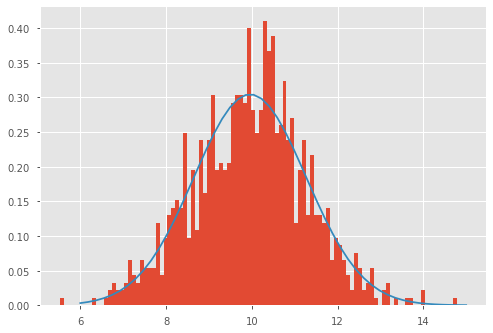

In [395]:
plt.hist(x, bins = 100, density=True)
plt.plot(np.linspace(6,15), stats.norm.pdf(np.linspace(6,15), mean,sigma))

More or less the same, but we are seeing some outliers here and there, there seem notably less distribution near the mean

# 5.4 Distribution of averages and differences

In [320]:
def height_sim(n_sim=1000, n_trial=100):
    height_diff = []
    for i in range(0, n_sim):
        male_height = []
        female_height = []
        for j in range(0, n_trial):
            male_height.append(np.random.normal(69.1, 2.9))
            female_height.append(np.random.normal(63.7,2.7))
        height_diff.append(np.mean(male_height)-np.mean(female_height))
    return height_diff

In [321]:
height_diff = height_sim()

In [326]:
print(f"""simulated x-y mean is {np.mean(height_diff)}, simulated x-y std is {np.std(height_diff)}
        actual x-y mean is {69.1-63.7}, actual x-y std is {np.sqrt(np.power(2.9,2)+np.power(2.7,2))}
        """)

simulated x-y mean is 5.416324640638626, simulated x-y std is 0.39830539875336474
        actual x-y mean is 5.3999999999999915, actual x-y std is 3.96232255123179
        


The standard deviation is way off, but that's because we are using standard error rather than standard deviation

In [333]:
np.std(height_diff)*np.sqrt(100) #we are using the 100 trial

3.9830539875336473

(array([  1.,  18.,  92., 180., 275., 276., 110.,  36.,  11.,   1.]),
 array([4.03112708, 4.32439912, 4.61767116, 4.9109432 , 5.20421524,
        5.49748728, 5.79075932, 6.08403136, 6.3773034 , 6.67057544,
        6.96384748]),
 <a list of 10 Patch objects>)

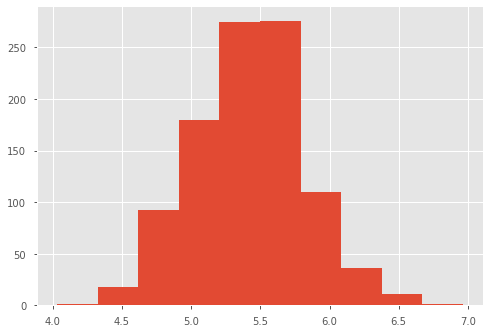

In [327]:
plt.hist(height_diff)